# Table of contents
1. [Preliminaries](#preliminaries)
2. [Historical closing prices](#plots)
3. [Risk analysis 1](#risk1)
4. [Risk analysis 2](#risk2)
5. [Risk analysis 3](#risk3)


In this notebook I'm exploring the stock prices and stock market trends of four companies producing medical equipment: Boston Scientific, Medtronic, Abbot Laboratories and Johnson & Johnson.

The analysis follows a stock market analysis done by Jose Portilla for his course Learning Python for Data Analysis and Visualization.

# Preliminaries <a name="preliminaries"></a>

In [1]:
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
# For Visualization
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


# For time stamps
from datetime import datetime
from dateutil.relativedelta import relativedelta



In [2]:
# Creating a list of stock market names for Medtronic,Abbot Laboratories,Johnson & Johnson, Boston Scientific:

Med_list=['MDT','ABT','JNJ','BSX']

In [3]:
# Creating the time frame for the analysis:

start=datetime.now()+ relativedelta(months=-12)
end=datetime.now()

for stock in Med_list:
    # Set DataFrame as the Stock Ticker
    globals()[stock] = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Historical closing prices and correlations <a name="plots"></a>

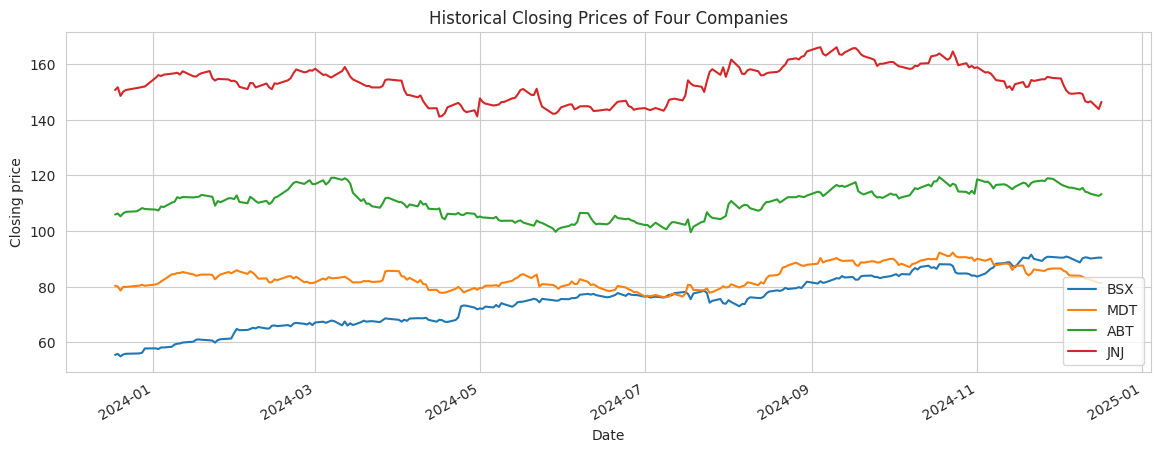

In [4]:
# Historical view of closing price of the four companies:

fig, ax = plt.subplots(figsize=(14, 5))

BSX['Adj Close'].plot(ax=ax, label='BSX', legend=True)
MDT['Adj Close'].plot(ax=ax, label='MDT', legend=True)
ABT['Adj Close'].plot(ax=ax, label='ABT', legend=True)
JNJ['Adj Close'].plot(ax=ax, label='JNJ', legend=True)

# Add labels and title
ax.set_ylabel('Closing price')
ax.set_title('Historical Closing Prices of Four Companies')

# Show the plot with legend
ax.legend()
plt.show()

## Volume of traded stocks

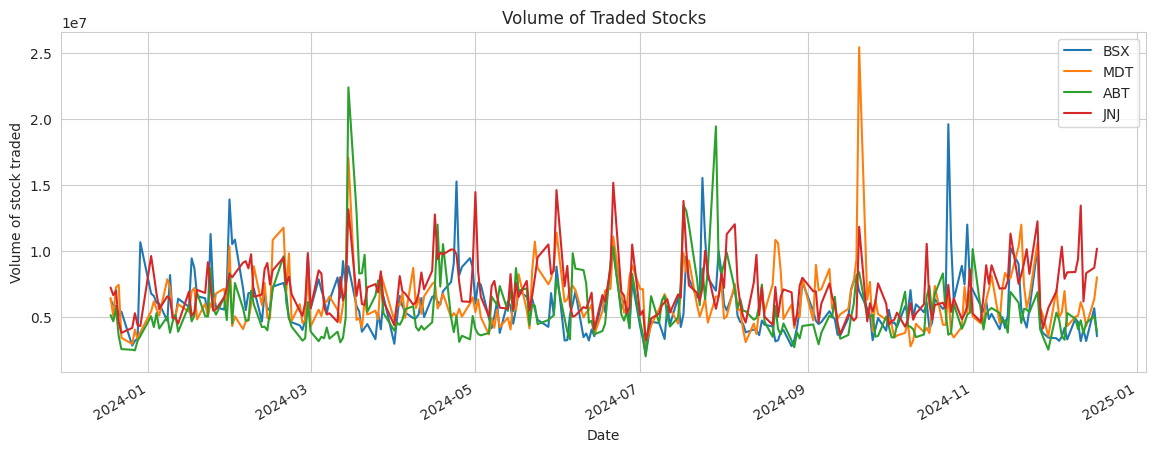

In [5]:
fig, ax = plt.subplots(figsize=(14, 5))

BSX['Volume'].plot(ax=ax, label='BSX',legend=True)
MDT['Volume'].plot(ax=ax, label='MDT',legend=True)
ABT['Volume'].plot(ax=ax, label='ABT',legend=True)
JNJ['Volume'].plot(ax=ax, label='JNJ',legend=True)
plt.ylabel('')

ax.set_ylabel('Volume of stock traded')
ax.set_title('Volume of Traded Stocks')

# Show the plot with legend
ax.legend()
plt.show()

# Moving average

We will compute the moving average over 10 days for all the stocks and plot it.

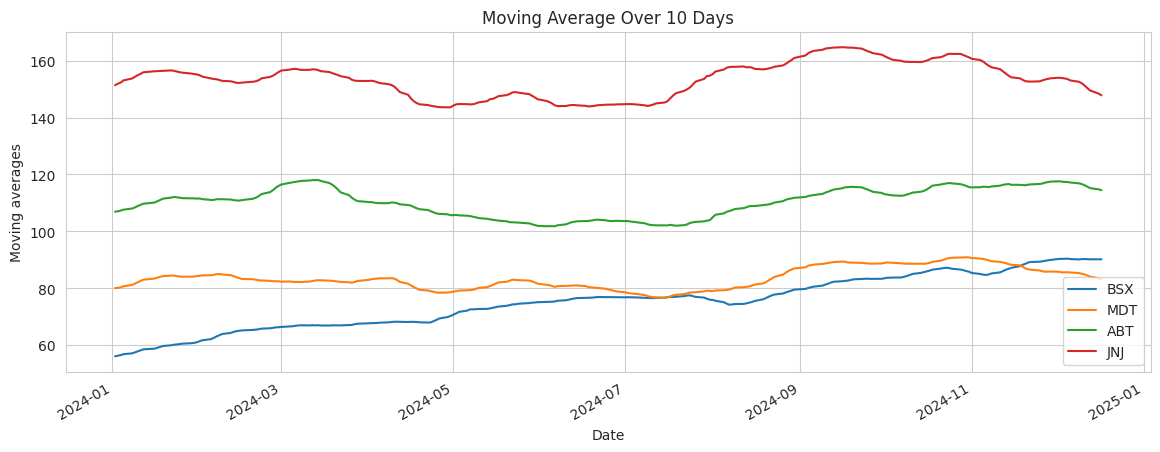

In [6]:
fig, ax = plt.subplots(figsize=(14, 5))

BSX['Adj Close'].rolling(window=10).mean().dropna().plot(ax=ax, label='BSX',legend=True)
MDT['Adj Close'].rolling(window=10).mean().dropna().plot(ax=ax, label='MDT',legend=True)
ABT['Adj Close'].rolling(window=10).mean().dropna().plot(ax=ax,label='ABT',legend=True)
JNJ['Adj Close'].rolling(window=10).mean().dropna().plot(ax=ax,label='JNJ',legend=True)

ax.set_ylabel('Moving averages')
ax.set_title('Moving Average Over 10 Days')

# Show the plot with legend
ax.legend()
plt.show()

# Daily returns

In [7]:
# Looking at daily returns of these stocks by taking the percentage change of closing price:

closing=yf.download(['MDT','ABT','JNJ','BSX'],start,end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [8]:
returns=closing.pct_change()

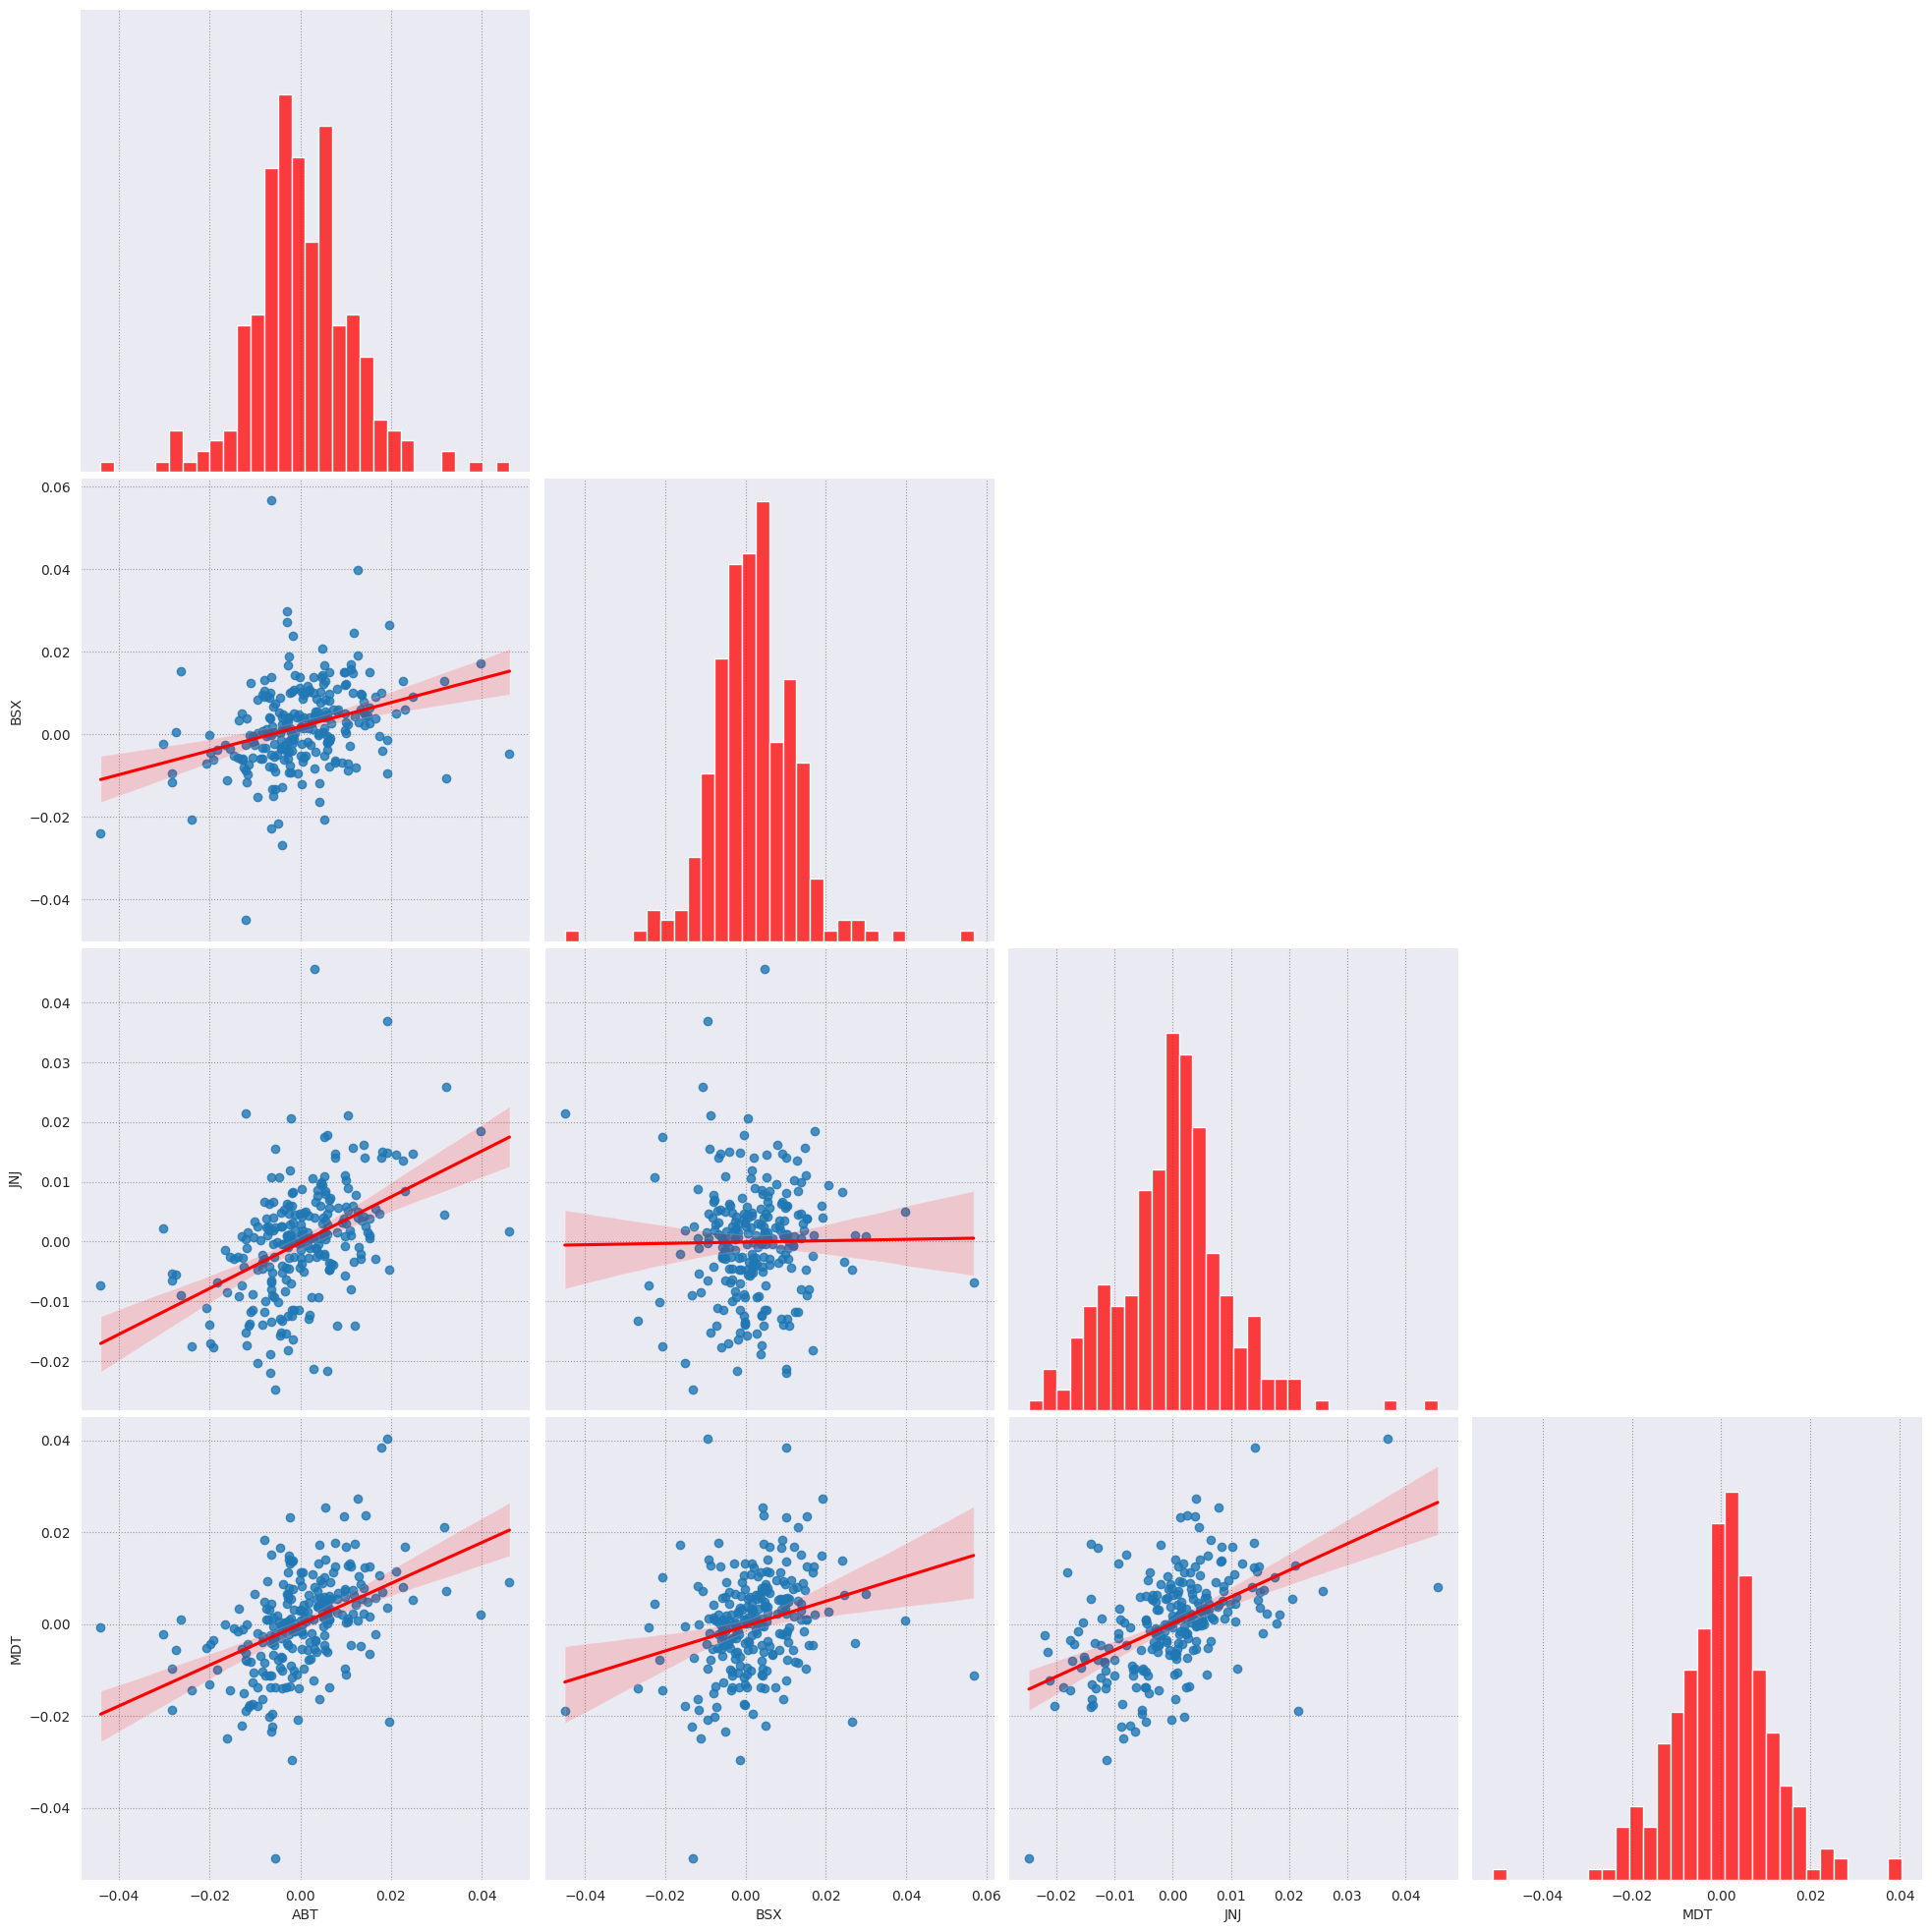

In [9]:
#sns.set_style('whitegrid')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.pairplot(returns.dropna(),kind='reg', diag_kind='hist', diag_kws=dict(color='red', bins=30),
             plot_kws={'line_kws':{'color':'red'}},height=5,corner=True)

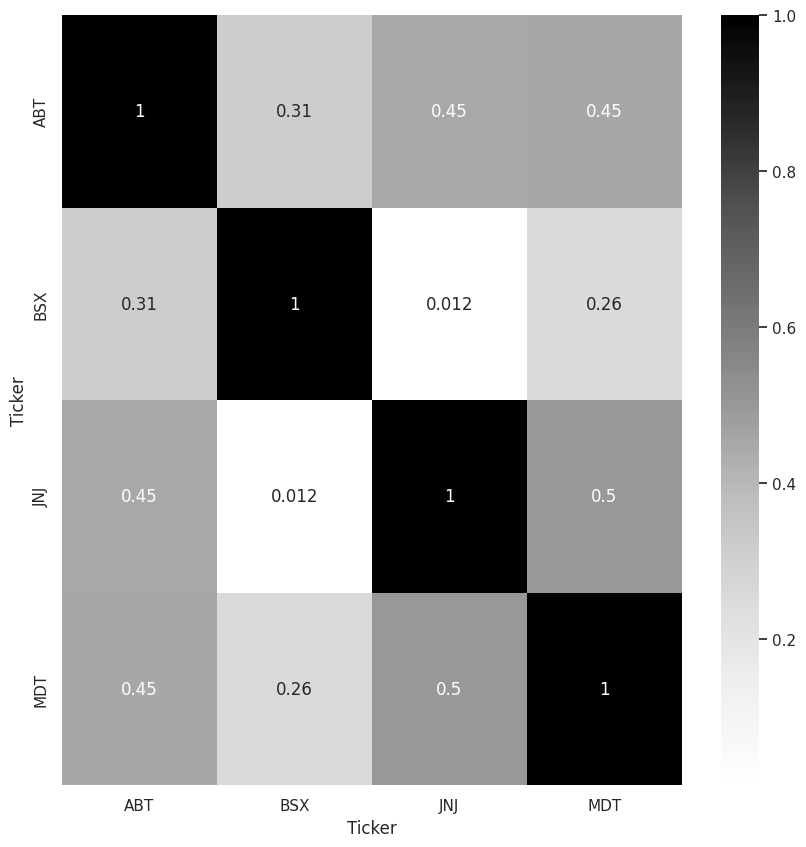

In [10]:
#plt.plot(figsize=(20,15))
sns.color_palette("rocket")
sns.set (rc = {'figure.figsize':(10, 10)})
corr_matrix=sns.heatmap(returns.dropna().corr('pearson'),cmap="Greys",annot=True)
#corr_matrix.style.background_gradient(cmap='crest')

The strongest correlation between Medtronic and Johnson&Johnson, 0.5. Still, this is a relatively mild corellation.

# Risk analysis 1 <a name="risk1"></a>

One of the common ways to develop some intuition about the volatility of stocks is plotting the expected returns against the standard deviation. This is what we will do here.

We use daily returns we found in the previous section, first removing null values.

In [11]:
area = np.pi*5


In [12]:
returns1=returns.dropna()

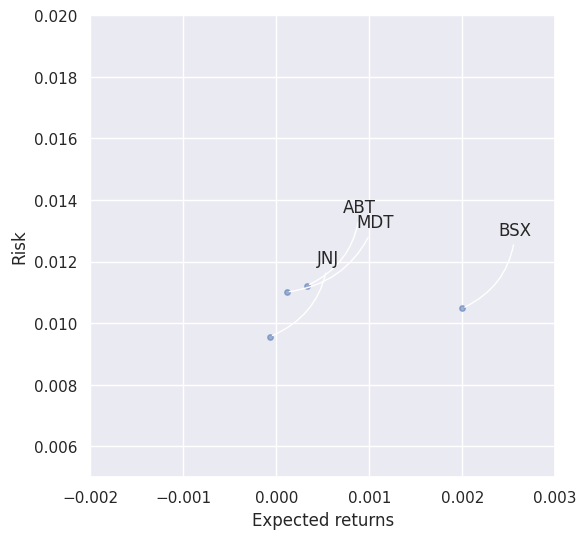

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(returns1.mean(), returns1.std(),alpha = 0.5,s =area)
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.ylim([0.005,0.020])
plt.xlim([-0.002,0.003])
for label, x, y in zip(returns1.columns, returns1.mean(), returns1.std()):
    if label=='MDT':
        plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'left', va = 'center',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))
    else:
        plt.annotate(
            label,
            xy = (x, y), xytext = (50, 50),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


Boston Scientific has the largest expected return and Johnson&Johnson has the smallest standard deviation of daily returns.

# Risk analysis 2 <a name="risk2"></a>

## Value at risk

Let's examine the value at risk of our stocks. We are interested in 95% confidence with regards to daily loss. We use the NumPy quantile method:

In [14]:
for label in returns1.columns:
    print(f' With 95% confidence, for ' +str(label) +' stock, our worst daily loss will not exceed ' + str(100*returns1[str(label)].quantile(0.05)) +' percent.')

 With 95% confidence, for ABT stock, our worst daily loss will not exceed -1.6321572751749058 percent.
 With 95% confidence, for BSX stock, our worst daily loss will not exceed -1.2405170788787723 percent.
 With 95% confidence, for JNJ stock, our worst daily loss will not exceed -1.5621063104375665 percent.
 With 95% confidence, for MDT stock, our worst daily loss will not exceed -1.7902913219024985 percent.


# Risk analysis 3 <a name="risk3"></a>

## Monte Carlo simulation for Boston Scientific stock

We use the following formula for the change in stock price:

1.   List item
2.   List item



$\Delta S=S(\Delta t\mu+\sigma \epsilon \sqrt{\Delta t})$,

where $S$ is the stock price (we will input the start price for our data and use the formula to make predictions), $\mu$ is the mean of daily returns,

$\sigma$ is their standard deviation
and $\epsilon$ is a standard normal variable. The first term is called drift, the second is shock.

In [15]:
# Defining the prediction span:

days=365
dt=1/days

# Calculating the mean and standard deviation:

mu=returns1['BSX'].mean()
sigma=returns1['BSX'].std()

In [16]:
def monte_carlo(start_price,days,mu,sigma):

    projected_price = np.zeros(days)
    projected_price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)

    # Iteratively computing the stock price after a prescribed number of days:

    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        projected_price[x] = projected_price[x-1] + (projected_price[x-1] * (drift[x] + shock[x]))

    return projected_price

In [17]:
closing['BSX'].head()

,BSX
Date,
2023-12-18,55.509998
2023-12-19,55.820000
2023-12-20,54.980000
2023-12-21,55.650002
2023-12-22,55.900002


 We see the start price is $55.509998.

In [18]:
start_price=55.509998

We will run 700 Monte Carlo simulations for 365 days to get new stock price. Then, using the results obtained in simmulations, we will find the 99% confidence interval for the worst possible loss after a year on the investment of $55.509998.

Text(0.5, 1.0, 'Monte Carlo Simulations for Boston Scientific')

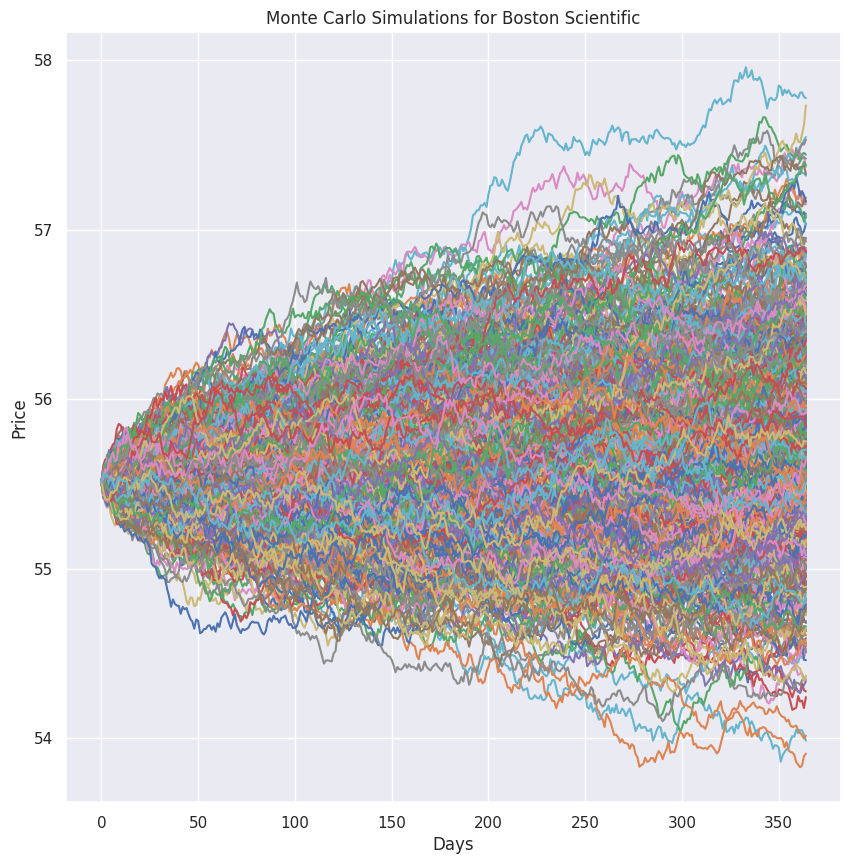

In [19]:
for run in range(700):
    plt.plot(monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Simulations for Boston Scientific')

Now we will collect the final prices (the index days-1 below) for all 700 runs in an array and find the 99-th percentile:


In [20]:
runs=np.zeros(700)
for run in range(700):
    runs[run]=monte_carlo(start_price,days,mu,sigma)[days-1]
q=np.percentile(runs,1)

We will plot the distribution of all 700 predicted prices after a year, with the 99% confidence line (on the left, since we care about the possible loss). We add some statistical information, like the mean of the predicted prices and the variance.

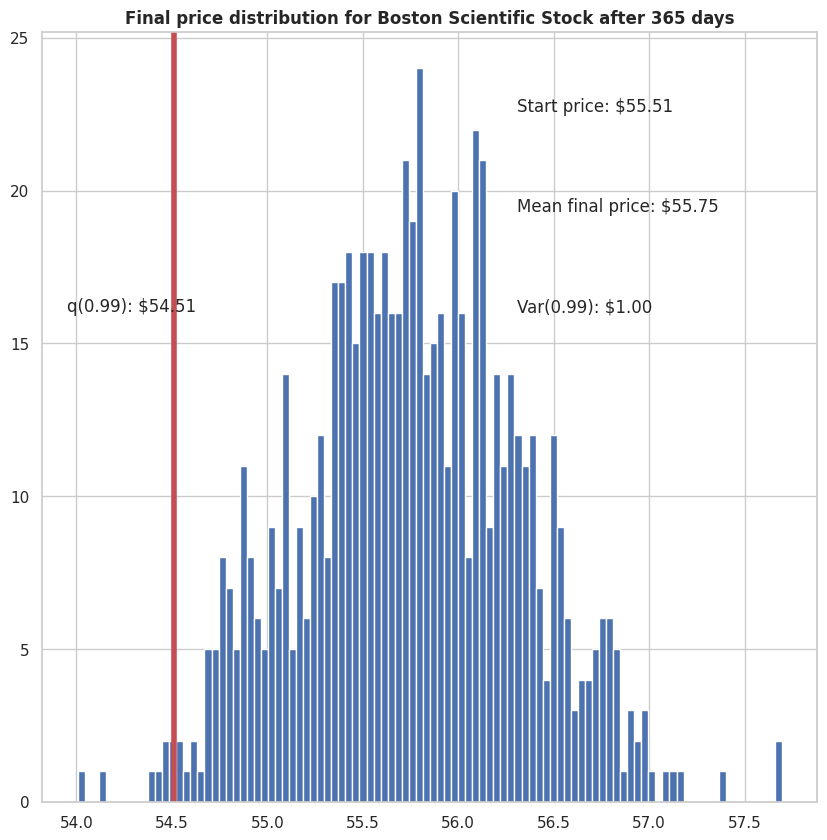

In [21]:
sns.set_style('whitegrid')

plt.hist(runs, bins=100)


plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % runs.mean())

plt.figtext(0.6, 0.6, "Var(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Boston Scientific Stock after %s days" % days, weight='bold');
plt.show()

So with 99% confidence, after a year, the most we will lose on a $\$55.5$ investement in Boston Scientific stock is about one dollar.